<a href="https://colab.research.google.com/github/Chuyini/Modelo-GRU-/blob/main/ProyectoGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#how to upload any data from your computer in python

from google.colab import files;          #the library it require
NoLinearData= files.upload();
data= pd.read_csv('Bitcoin Historical Data.csv')  #here you put the data´s name

Saving Bitcoin Historical Data.csv to Bitcoin Historical Data (1).csv


In [ ]:
data

Cargar el dataset de valores de acciones
 Puedes cargar tus propios datos aquí o utilizar fuentes de datos en línea
 En este ejemplo, generaremos datos ficticios

In [ ]:
# Normalizar solo la columna 'Price'scaler = MinMaxScaler()
# Cargar los datos reales de precios de Bitcoin
data = pd.read_csv('Bitcoin Historical Data.csv')

# Asegúrate de que los datos estén ordenados por fecha en orden ascendente
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data['Price'] = data['Price'].str.replace(',', '').astype(float)
# Normalizar los datos de precio
scaler = MinMaxScaler()
data['Price'] = scaler.fit_transform(data['Price'].values.reshape(-1, 1))


In [ ]:
# Preparar los datos de entrenamiento y prueba
X = []
y = []
sequence_length = 10  # Longitud de la secuencia de entrada
for i in range(len(data) - sequence_length):
    X.append(data['Price'].iloc[i:i + sequence_length].values)
    y.append(data['Price'].iloc[i + sequence_length])
X = np.array(X)
y = np.array(y)

In [ ]:
# Entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en datos de prueba: {loss}')

1/1 [==============================] - 1s 881ms/step - loss: 0.2506
Pérdida en datos de prueba: 0.2506478726863861


In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 691ms/step


In [ ]:
# Desnormalizar las predicciones
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

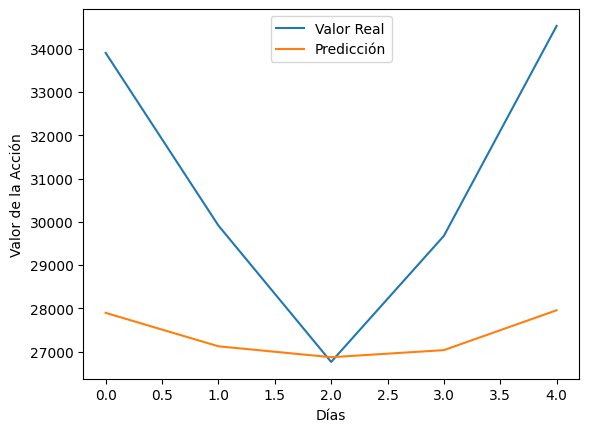

In [ ]:
# Graficar las predicciones
plt.plot(y_test, label='Valor Real')
plt.plot(y_pred, label='Predicción')
plt.xlabel('Días')
plt.ylabel('Valor de la Acción')
plt.legend()
plt.show()

In [ ]:
# Tomar los últimos 10 valores de precio como entrada
X_future = data['Price'].iloc[-sequence_length:].values


# Normalizar la secuencia de entrada
X_future = scaler.transform(X_future.reshape(-1, 1))

# Reshape de la secuencia para que coincida con la forma de entrada de la red
X_future_sequence = X_future.reshape(1, sequence_length, 1)
print(X_future_sequence.shape)
# Realiza predicciones basadas en 'X_future_sequence' utilizando el modelo
y_future = model.predict(X_future_sequence)

# Desnormaliza las predicciones si es necesario (si habías normalizado los datos durante el entrenamiento)
y_future = scaler.inverse_transform(y_future)

(1, 10, 1)


TypeError: ignored